# RIDGE/LASSO REGRESSION MODEL. MODELO B

In [ ]:
#Abrir csv del conjunto de datos limpio

import pandas as pd

df_copy_2_interpolado_copy_sin_outliers = pd.read_csv('dataset_limpio_B.csv', sep=",")
df_copy_2_interpolado_copy_sin_outliers

Año  Mes  Día  Hora  Minuto  B_Optimal - Power DC [W]  \
0       2014    1    1     7      41                  2.388366   
1       2014    1    1     7      42                  2.388366   
2       2014    1    1     7      43                  1.173375   
3       2014    1    1     7      44                  1.278375   
4       2014    1    1     7      45                  1.325625   
...      ...  ...  ...   ...     ...                       ...   
616347  2016   12   29    17      27                  0.731250   
616348  2016   12   29    17      28                  0.731250   
616349  2016   12   29    17      29                  0.731250   
616350  2016   12   29    17      30                  0.731250   
616351  2016   12   29    17      31                  0.731250   

        Ambient Temperature [ºC]  Global Radiation [W/m2]  Ultraviolet [W/m2]  \
0                       9.700000                 7.131149            0.751824   
1                       9.700000                 7.040442            0.781930   
2                       9.700000                 6.594407            0.813929   
3                       9.700000                 7.358729            0.849919   
4                       9.700000                 7.470711            0.886891   
...                          ...                      ...                 ...   
616347                 15.200000                 6.546354            0.836866   
616348                 15.200000                 6.481665            0.801994   
616349                 15.200000                 4.924317            0.766211   
616350                 15.133332                 5.480427            0.740643   
616351                 15.100000                 4.963671            0.713967   

        Wind Velocity [m/s]  Wind Direction [º]  
0                  0.700000          275.333840  
1                  0.666667          278.503060  
2                  0.616667          284.667120  
3                  0.666667          278.666660  
4                  0.633333          272.666360  
...                     ...                 ...  
616347             0.683333           90.670424  
616348             0.833333           87.849608  
616349             0.883333           84.505200  
616350             0.783333           72.378000  
616351             0.916667           81.767752  

[616352 rows x 11 columns]

In [21]:
df_copy_2_interpolado_copy_sin_outliers.isna().sum()

Año                         0
Mes                         0
Día                         0
Hora                        0
Minuto                      0
B_Optimal - Power DC [W]    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

## 1. Particionado datos ML

In [22]:
#PARTICIONADO DEL CONJUNTO DE DATOS: DF
# Construcción de una función que realice el particionado completo

from sklearn.model_selection import train_test_split

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

df = df_copy_2_interpolado_copy_sin_outliers
# División del conjunto de datos 
train_set, val_set, test_set = train_val_test_split(df)

print("Longitud del conjunto de datos:", len(df))
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del conjunto de datos: 616352
Longitud del Training Set: 369811
Longitud del Validation Set: 123270
Longitud del Test Set: 123271


In [23]:
def preparar_datos(df, prototipo):
    """
    Función para preparar datos de entrenamiento, validación y prueba
    para diferentes prototipos.
    
    Parámetros:
    df (DataFrame): El conjunto de datos de entrada.
    prototipo (str): El prototipo ('A' o 'B').
        
    Retorna:
    tuple: DataFrames X_train, y_train, X_val, y_val, X_test, y_test.
    """
    columna_objetivo = f"{prototipo}_Optimal - Power DC [W]"
    
    X_train = train_set.drop(columna_objetivo, axis=1)
    y_train = train_set[columna_objetivo].copy()
    
    X_val = val_set.drop(columna_objetivo, axis=1)
    y_val = val_set[columna_objetivo].copy()
    
    X_test = test_set.drop(columna_objetivo, axis=1)
    y_test = test_set[columna_objetivo].copy()
    
    return X_train, y_train, X_val, y_val, X_test, y_test

prototipo_seleccionado = 'B'
# Preparar los datos basados en la selección del usuario
X_train, y_train, X_val, y_val, X_test, y_test = preparar_datos(df, prototipo_seleccionado)

X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_val = X_val.sort_index()
y_val = y_val.sort_index()
X_test = X_test.sort_index()
y_test= y_test.sort_index()

Text(0.5, 1.0, 'Pruebas - B_Optimal - Power DC [W]')

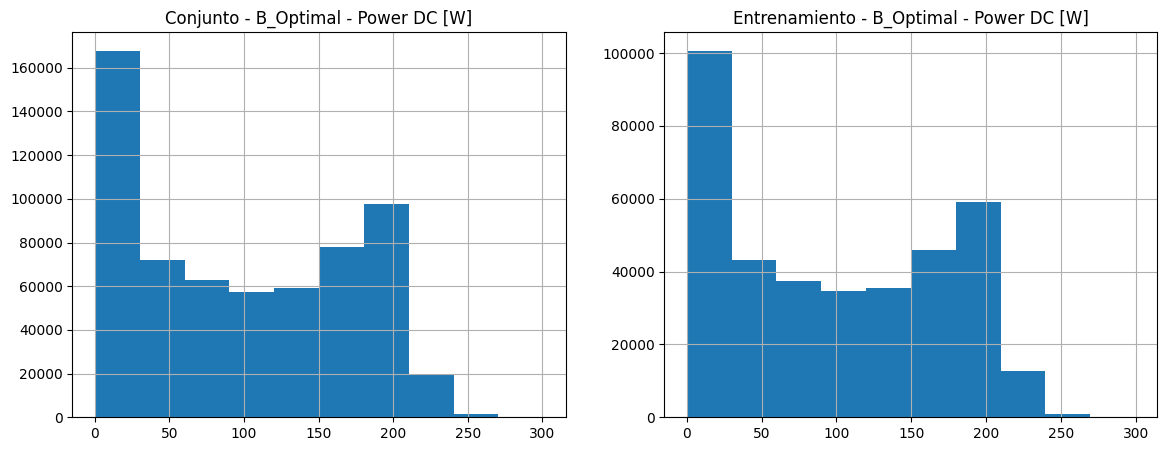

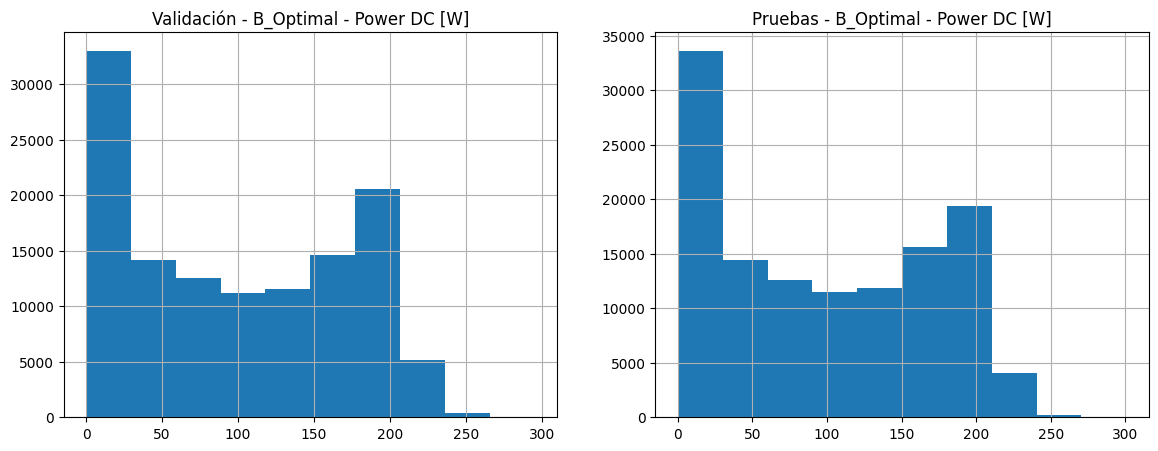

In [24]:
import matplotlib.pyplot as plt
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
plt.figure(figsize=(14, 5))

plt.subplot(121)
df["B_Optimal - Power DC [W]"].hist()
plt.title('Conjunto - B_Optimal - Power DC [W]')

plt.subplot(122)
train_set["B_Optimal - Power DC [W]"].hist()
plt.title('Entrenamiento - B_Optimal - Power DC [W]')


plt.figure(figsize=(14, 5))
plt.subplot(121)
val_set["B_Optimal - Power DC [W]"].hist()
plt.title('Validación - B_Optimal - Power DC [W]')

plt.subplot(122)
test_set["B_Optimal - Power DC [W]"].hist()
plt.title('Pruebas - B_Optimal - Power DC [W]')

#se mantiene la proporción.

# 2. Copia de conjunto particionado

In [25]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_test_copy = X_test.copy()

y_train_copy = y_train.copy()
y_val_copy = y_val.copy()
y_test_copy = y_test.copy()

# 3. Escalado de los datos
Se escalarán los datos y se comprobará si escalando se obtienen mejores resultados.

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
y_train_scaled = scaler.fit_transform(y_train_copy.values.reshape(-1, 1))
X_val_scaled = scaler.fit_transform(X_val_copy)
y_val_scaled = scaler.fit_transform(y_val_copy.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test_copy)
y_test_scaled = scaler.fit_transform(y_test_copy.values.reshape(-1, 1))

# Transformación a un DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_copy.columns, index=X_train_copy.index)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['B_Optimal - Power DC [W]'], index=y_train_copy.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_copy.columns, index=X_val_copy.index)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=['B_Optimal - Power DC [W]'], index=y_val_copy.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_copy.columns, index=X_test_copy.index)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['B_Optimal - Power DC [W]'], index=y_test_copy.index)


#DATOS ESCALADOS
# Copiamos el conjunto de datos para no alterar el original
X_train_scaled_copy = X_train_scaled.copy()
y_train_scaled_copy = y_train_scaled.copy()
X_val_scaled_copy = X_val_scaled.copy()
y_val_scaled_copy = y_val_scaled.copy()
X_test_scaled_copy = X_test_scaled.copy()
y_test_scaled_copy = y_test_scaled.copy()
X_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS X_train 
X_train_scaled_copy.isna().any()
y_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS y_train
y_train_scaled_copy.isna().any()

B_Optimal - Power DC [W]    False
dtype: bool

Tanto los datos escalados como los sin escalar NO tienen valores nulos (NAN)

# 4 Algoritmo: Ridge Lasso Regression

## Entrenamiento


In [8]:
from sklearn.linear_model import RidgeCV, LassoCV
import time

# Definir una lista de valores de alpha para probar
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

# Crear el modelo de regresión Ridge con validación cruzada
rdg_cv = RidgeCV(alphas=alpha_values, store_cv_results=True)
start_time = time.time()
rdg_cv.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Ridge sin escalar: {end_time - start_time:.2f} segundos")

# Crear el modelo de regresión Ridge Escalado con validación cruzada
rdg_cv_scaled = RidgeCV(alphas=alpha_values, store_cv_results=True)
start_time = time.time()
rdg_cv_scaled.fit(X_train_scaled_copy, y_train_scaled_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Ridge escalado: {end_time - start_time:.2f} segundos")

# Crear el modelo de regresión Lasso con validación cruzada
lasso_cv = LassoCV(alphas=alpha_values, cv=5, max_iter=10000)
start_time = time.time()
lasso_cv.fit(X_train_copy, y_train_copy.values.ravel())
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Lasso sin escalar: {end_time - start_time:.2f} segundos")

# Crear el modelo de regresión Lasso Escalado con validación cruzada
lasso_cv_scaled = LassoCV(alphas=alpha_values, cv=5, max_iter=10000)
start_time = time.time()
lasso_cv_scaled.fit(X_train_scaled_copy, y_train_scaled_copy.values.ravel())
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Lasso escalado: {end_time - start_time:.2f} segundos")


# Obtener el mejor valor de alpha Ridge
best_alpha = rdg_cv.alpha_
best_alpha_scaled = rdg_cv_scaled.alpha_
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Mejor valor de alpha escalado: {best_alpha_scaled}")

# Obtener el mejor valor de alpha Lasso
best_alpha_lasso = lasso_cv.alpha_
best_alpha_lasso_scaled = lasso_cv_scaled.alpha_
print(f"Mejor valor de alpha para Lasso: {best_alpha_lasso}")
print(f"Mejor valor de alpha para Lasso escalado: {best_alpha_lasso_scaled}")


Tiempo de entrenamiento para el modelo Ridge sin escalar: 0.75 segundos
Tiempo de entrenamiento para el modelo Ridge escalado: 0.73 segundos
Tiempo de entrenamiento para el modelo Lasso sin escalar: 4.55 segundos
Tiempo de entrenamiento para el modelo Lasso escalado: 1.31 segundos
Mejor valor de alpha: 100.0
Mejor valor de alpha escalado: 0.1
Mejor valor de alpha para Lasso: 1.0
Mejor valor de alpha para Lasso escalado: 0.01


## Predicción

In [10]:
start_time = time.time()
# Predecimos con el conjunto de datos de entrenamiento
y_train_prep_pred_rdg_cv = rdg_cv.predict(X_train_copy)
# Predecimos con el conjunto de datos de validacion
y_val_prep_pred_rdg_cv = rdg_cv.predict(X_val_copy)
# Predecimos con el conjunto de datos de prueba
y_test_prep_pred_rdg_cv = rdg_cv.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Ridge sin escalar: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_prep_pred_rdg_cv_scaled = rdg_cv_scaled.predict(X_train_scaled_copy)
y_val_prep_pred_rdg_cv_scaled = rdg_cv_scaled.predict(X_val_scaled_copy)
y_test_prep_pred_rdg_cv_scaled = rdg_cv_scaled.predict(X_test_scaled_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Ridge escalado: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_prep_pred_lasso_cv = lasso_cv.predict(X_train_copy)
y_val_prep_pred_lasso_cv = lasso_cv.predict(X_val_copy)
y_test_prep_pred_lasso_cv = lasso_cv.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Lasso sin escalar: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_prep_pred_lasso_cv_scaled = lasso_cv_scaled.predict(X_train_scaled_copy)
y_val_prep_pred_lasso_cv_scaled = lasso_cv_scaled.predict(X_val_scaled_copy)
y_test_prep_pred_lasso_cv_scaled = lasso_cv_scaled.predict(X_test_scaled_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Lasso escalado: {end_time - start_time:.2f} segundos")


Tiempo de predicción para el modelo Ridge sin escalar: 0.09 segundos
Tiempo de predicción para el modelo Ridge escalado: 0.04 segundos
Tiempo de predicción para el modelo Lasso sin escalar: 0.06 segundos
Tiempo de predicción para el modelo Lasso escalado: 0.03 segundos


## Métricas

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo con los conjuntos de datos de entrenamiento
mse_train_rdg_cv = mean_squared_error(y_train_prep_pred_rdg_cv, y_train_copy)
r2_train_rdg_cv = r2_score(y_train_prep_pred_rdg_cv, y_train_copy)
mae_train_rdg_cv = mean_absolute_error(y_train_prep_pred_rdg_cv, y_train_copy)

mse_val_rdg_cv = mean_squared_error(y_val_prep_pred_rdg_cv, y_val_copy)
r2_val_rdg_cv = r2_score(y_val_prep_pred_rdg_cv, y_val_copy)
mae_val_rdg_cv = mean_absolute_error(y_val_prep_pred_rdg_cv, y_val_copy)

mse_test_rdg_cv = mean_squared_error(y_test_prep_pred_rdg_cv, y_test_copy)
r2_test_rdg_cv = r2_score(y_test_prep_pred_rdg_cv, y_test_copy)
mae_test_rdg_cv = mean_absolute_error(y_test_prep_pred_rdg_cv, y_test_copy)

# Evaluar el modelo con los conjuntos de datos de entrenamiento escalados   
mse_train_rdg_cv_scaled = mean_squared_error(y_train_prep_pred_rdg_cv_scaled, y_train_scaled_copy)
r2_train_rdg_cv_scaled = r2_score(y_train_prep_pred_rdg_cv_scaled, y_train_scaled_copy)
mae_train_rdg_cv_scaled = mean_absolute_error(y_train_prep_pred_rdg_cv_scaled, y_train_scaled_copy)

mse_val_rdg_cv_scaled = mean_squared_error(y_val_prep_pred_rdg_cv_scaled, y_val_scaled_copy)
r2_val_rdg_cv_scaled = r2_score(y_val_prep_pred_rdg_cv_scaled, y_val_scaled_copy)
mae_val_rdg_cv_scaled = mean_absolute_error(y_val_prep_pred_rdg_cv_scaled, y_val_scaled_copy)

mse_test_rdg_cv_scaled = mean_squared_error(y_test_prep_pred_rdg_cv_scaled, y_test_scaled_copy)
r2_test_rdg_cv_scaled = r2_score(y_test_prep_pred_rdg_cv_scaled, y_test_scaled_copy)
mae_test_rdg_cv_scaled = mean_absolute_error(y_test_prep_pred_rdg_cv_scaled, y_test_scaled_copy)

print('\n Ridge Regression:')
print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_rdg_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_rdg_cv:.3f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_rdg_cv:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_rdg_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_rdg_cv:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_rdg_cv:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_rdg_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_rdg_cv:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_rdg_cv:.2f}")

print('\n Ridge Regression (scaled):')
print(f"Error Cuadrático Medio (MSE) Train Set Escalado: {mse_train_rdg_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set Escalado: {r2_train_rdg_cv_scaled:.3f}")
print(f"Error Absoluto Medio (MAE) Train Set Escalado: {mae_train_rdg_cv_scaled:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set Escalado: {mse_val_rdg_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set Escalado: {r2_val_rdg_cv_scaled:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set Escalado: {mae_val_rdg_cv_scaled:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set Escalado: {mse_test_rdg_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set Escalado: {r2_test_rdg_cv_scaled:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set Escalado: {mae_test_rdg_cv_scaled:.2f}")

# Evaluar el modelo con los conjuntos de datos de entrenamiento, validación y prueba
mse_train_lasso_cv = mean_squared_error(y_train_prep_pred_lasso_cv, y_train_copy)
r2_train_lasso_cv = r2_score(y_train_prep_pred_lasso_cv, y_train_copy)
mae_train_lasso_cv = mean_absolute_error(y_train_prep_pred_lasso_cv, y_train_copy)

mse_val_lasso_cv = mean_squared_error(y_val_prep_pred_lasso_cv, y_val_copy)
r2_val_lasso_cv = r2_score(y_val_prep_pred_lasso_cv, y_val_copy)
mae_val_lasso_cv = mean_absolute_error(y_val_prep_pred_lasso_cv, y_val_copy)

mse_test_lasso_cv = mean_squared_error(y_test_prep_pred_lasso_cv, y_test_copy)
r2_test_lasso_cv = r2_score(y_test_prep_pred_lasso_cv, y_test_copy)
mae_test_lasso_cv = mean_absolute_error(y_test_prep_pred_lasso_cv, y_test_copy)

print('\n Lasso Regression:')
print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_lasso_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_lasso_cv:.3f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_lasso_cv:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_lasso_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_lasso_cv:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_lasso_cv:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_lasso_cv:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_lasso_cv:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_lasso_cv:.2f}")

# Evaluar el modelo con los conjuntos de datos de entrenamiento escalados
mse_train_lasso_cv_scaled = mean_squared_error(y_train_prep_pred_lasso_cv_scaled, y_train_scaled_copy)
r2_train_lasso_cv_scaled = r2_score(y_train_prep_pred_lasso_cv_scaled, y_train_scaled_copy)
mae_train_lasso_cv_scaled = mean_absolute_error(y_train_prep_pred_lasso_cv_scaled, y_train_scaled_copy)

mse_val_lasso_cv_scaled = mean_squared_error(y_val_prep_pred_lasso_cv_scaled, y_val_scaled_copy)
r2_val_lasso_cv_scaled = r2_score(y_val_prep_pred_lasso_cv_scaled, y_val_scaled_copy)
mae_val_lasso_cv_scaled = mean_absolute_error(y_val_prep_pred_lasso_cv_scaled, y_val_scaled_copy)

mse_test_lasso_cv_scaled = mean_squared_error(y_test_prep_pred_lasso_cv_scaled, y_test_scaled_copy)
r2_test_lasso_cv_scaled = r2_score(y_test_prep_pred_lasso_cv_scaled, y_test_scaled_copy)
mae_test_lasso_cv_scaled = mean_absolute_error(y_test_prep_pred_lasso_cv_scaled, y_test_scaled_copy)

print('\n Lasso Regression (scaled):')
print(f"Error Cuadrático Medio (MSE) Train Set Escalado: {mse_train_lasso_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set Escalado: {r2_train_lasso_cv_scaled:.3f}")
print(f"Error Absoluto Medio (MAE) Train Set Escalado: {mae_train_lasso_cv_scaled:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set Escalado: {mse_val_lasso_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set Escalado: {r2_val_lasso_cv_scaled:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set Escalado: {mae_val_lasso_cv_scaled:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set Escalado: {mse_test_lasso_cv_scaled:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set Escalado: {r2_test_lasso_cv_scaled:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set Escalado: {mae_test_lasso_cv_scaled:.2f}")


 Ridge Regression:
Error Cuadrático Medio (MSE) Train Set: 1145.30
Coeficiente de Determinación (R^2) Train Set: 0.721
Error Absoluto Medio (MAE) Train Set: 23.54
Error Cuadrático Medio (MSE) Validation Set: 1138.93
Coeficiente de Determinación (R^2) Validation Set: 0.72
Error Absoluto Medio (MAE) Validation Set: 23.50
Error Cuadrático Medio (MSE) Test Set: 1127.92
Coeficiente de Determinación (R^2) Test Set: 0.73
Error Absoluto Medio (MAE) Test Set: 23.47

 Ridge Regression (scaled):
Error Cuadrático Medio (MSE) Train Set Escalado: 0.06
Coeficiente de Determinación (R^2) Train Set Escalado: 0.721
Error Absoluto Medio (MAE) Train Set Escalado: 0.16
Error Cuadrático Medio (MSE) Validation Set Escalado: 0.06
Coeficiente de Determinación (R^2) Validation Set Escalado: 0.72
Error Absoluto Medio (MAE) Validation Set Escalado: 0.16
Error Cuadrático Medio (MSE) Test Set Escalado: 0.05
Coeficiente de Determinación (R^2) Test Set Escalado: 0.72
Error Absoluto Medio (MAE) Test Set Escalado: 0.1

In [12]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas para Lasso, Ridge y sus versiones escaladas
resultados = pd.DataFrame({
    'Conjunto de Datos': ['Train', 'Validation', 'Test'],
    'MSE Ridge': [mse_train_rdg_cv, mse_val_rdg_cv, mse_test_rdg_cv],
    'R^2 Ridge': [r2_train_rdg_cv, r2_val_rdg_cv, r2_test_rdg_cv],
    'MAE Ridge': [mae_train_rdg_cv, mae_val_rdg_cv, mae_test_rdg_cv],
    'MSE Ridge Scaled': [mse_train_rdg_cv_scaled, mse_val_rdg_cv_scaled, mse_test_rdg_cv_scaled],
    'R^2 Ridge Scaled': [r2_train_rdg_cv_scaled, r2_val_rdg_cv_scaled, r2_test_rdg_cv_scaled],
    'MAE Ridge Scaled': [mae_train_rdg_cv_scaled, mae_val_rdg_cv_scaled, mae_test_rdg_cv_scaled],
    'MSE Lasso': [mse_train_lasso_cv, mse_val_lasso_cv, mse_test_lasso_cv],
    'R^2 Lasso': [r2_train_lasso_cv, r2_val_lasso_cv, r2_test_lasso_cv],
    'MAE Lasso': [mae_train_lasso_cv, mae_val_lasso_cv, mae_test_lasso_cv],
    'MSE Lasso Scaled': [mse_train_lasso_cv_scaled, mse_val_lasso_cv_scaled, mse_test_lasso_cv_scaled],
    'R^2 Lasso Scaled': [r2_train_lasso_cv_scaled, r2_val_lasso_cv_scaled, r2_test_lasso_cv_scaled],
    'MAE Lasso Scaled': [mae_train_lasso_cv_scaled, mae_val_lasso_cv_scaled, mae_test_lasso_cv_scaled]
})

# Mostrar la tabla de resultados
resultados

Conjunto de Datos    MSE Ridge  R^2 Ridge  MAE Ridge  MSE Ridge Scaled  \
0             Train  1145.296822   0.720897  23.537808          0.055638   
1        Validation  1138.929051   0.721457  23.499577          0.055522   
2              Test  1127.917548   0.725622  23.468639          0.054794   

   R^2 Ridge Scaled  MAE Ridge Scaled    MSE Lasso  R^2 Lasso  MAE Lasso  \
0          0.720897          0.164057  1148.342404   0.718823  23.564147   
1          0.721136          0.163890  1141.940131   0.719365  23.530133   
2          0.723526          0.164275  1130.474553   0.723684  23.491226   

   MSE Lasso Scaled  R^2 Lasso Scaled  MAE Lasso Scaled  
0          0.058460          0.668841          0.171829  
1          0.058429          0.668101          0.171917  
2          0.057553          0.672317          0.171845

In [13]:
from sklearn.model_selection import cross_val_score

# Ridge con datos escalados
scores_train_rdg_cv_scaled = cross_val_score(rdg_cv_scaled, X_train_scaled_copy, y_train_scaled_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TRAIN (Ridge Scaled): {-scores_train_rdg_cv_scaled.mean()}")

scores_val_rdg_cv_scaled = cross_val_score(rdg_cv_scaled, X_val_scaled_copy, y_val_scaled_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE VAL (Ridge Scaled): {-scores_val_rdg_cv_scaled.mean()}")

scores_test_rdg_cv_scaled = cross_val_score(rdg_cv_scaled, X_test_scaled_copy, y_test_scaled_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TEST (Ridge Scaled): {-scores_test_rdg_cv_scaled.mean()}")

# Lasso con datos escalados
scores_train_lasso_cv_scaled = cross_val_score(lasso_cv_scaled, X_train_scaled_copy, y_train_scaled_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TRAIN (Lasso Scaled): {-scores_train_lasso_cv_scaled.mean()}")

scores_val_lasso_cv_scaled = cross_val_score(lasso_cv_scaled, X_val_scaled_copy, y_val_scaled_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE VAL (Lasso Scaled): {-scores_val_lasso_cv_scaled.mean()}")

scores_test_lasso_cv_scaled = cross_val_score(lasso_cv_scaled, X_test_scaled_copy, y_test_scaled_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TEST (Lasso Scaled): {-scores_test_lasso_cv_scaled.mean()}")

# Ridge sin escalar
scores_train_rdg_cv = cross_val_score(rdg_cv, X_train_copy, y_train_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TRAIN (Ridge): {-scores_train_rdg_cv.mean()}")

scores_val_rdg_cv = cross_val_score(rdg_cv, X_val_copy, y_val_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE VAL (Ridge): {-scores_val_rdg_cv.mean()}")

scores_test_rdg_cv = cross_val_score(rdg_cv, X_test_copy, y_test_copy, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TEST (Ridge): {-scores_test_rdg_cv.mean()}")

# Lasso sin escalar
scores_train_lasso_cv = cross_val_score(lasso_cv, X_train_copy, y_train_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TRAIN (Lasso): {-scores_train_lasso_cv.mean()}")

scores_val_lasso_cv = cross_val_score(lasso_cv, X_val_copy, y_val_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE VAL (Lasso): {-scores_val_lasso_cv.mean()}")

scores_test_lasso_cv = cross_val_score(lasso_cv, X_test_copy, y_test_copy.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE TEST (Lasso): {-scores_test_lasso_cv.mean()}")

Cross-validated MSE TRAIN (Ridge Scaled): 0.05807080111709886
Cross-validated MSE VAL (Ridge Scaled): 0.05762837263664149
Cross-validated MSE TEST (Ridge Scaled): 0.05701568201217897
Cross-validated MSE TRAIN (Lasso Scaled): 0.06020509049961757
Cross-validated MSE VAL (Lasso Scaled): 0.059905754049856694
Cross-validated MSE TEST (Lasso Scaled): 0.05914043118268554
Cross-validated MSE TRAIN (Ridge): 1195.381703098133
Cross-validated MSE VAL (Ridge): 1182.4124768748188
Cross-validated MSE TEST (Ridge): 1174.148738250037
Cross-validated MSE TRAIN (Lasso): 1198.4153638938028
Cross-validated MSE VAL (Lasso): 1205.8232012245576
Cross-validated MSE TEST (Lasso): 1178.14898589648


## Gráficas

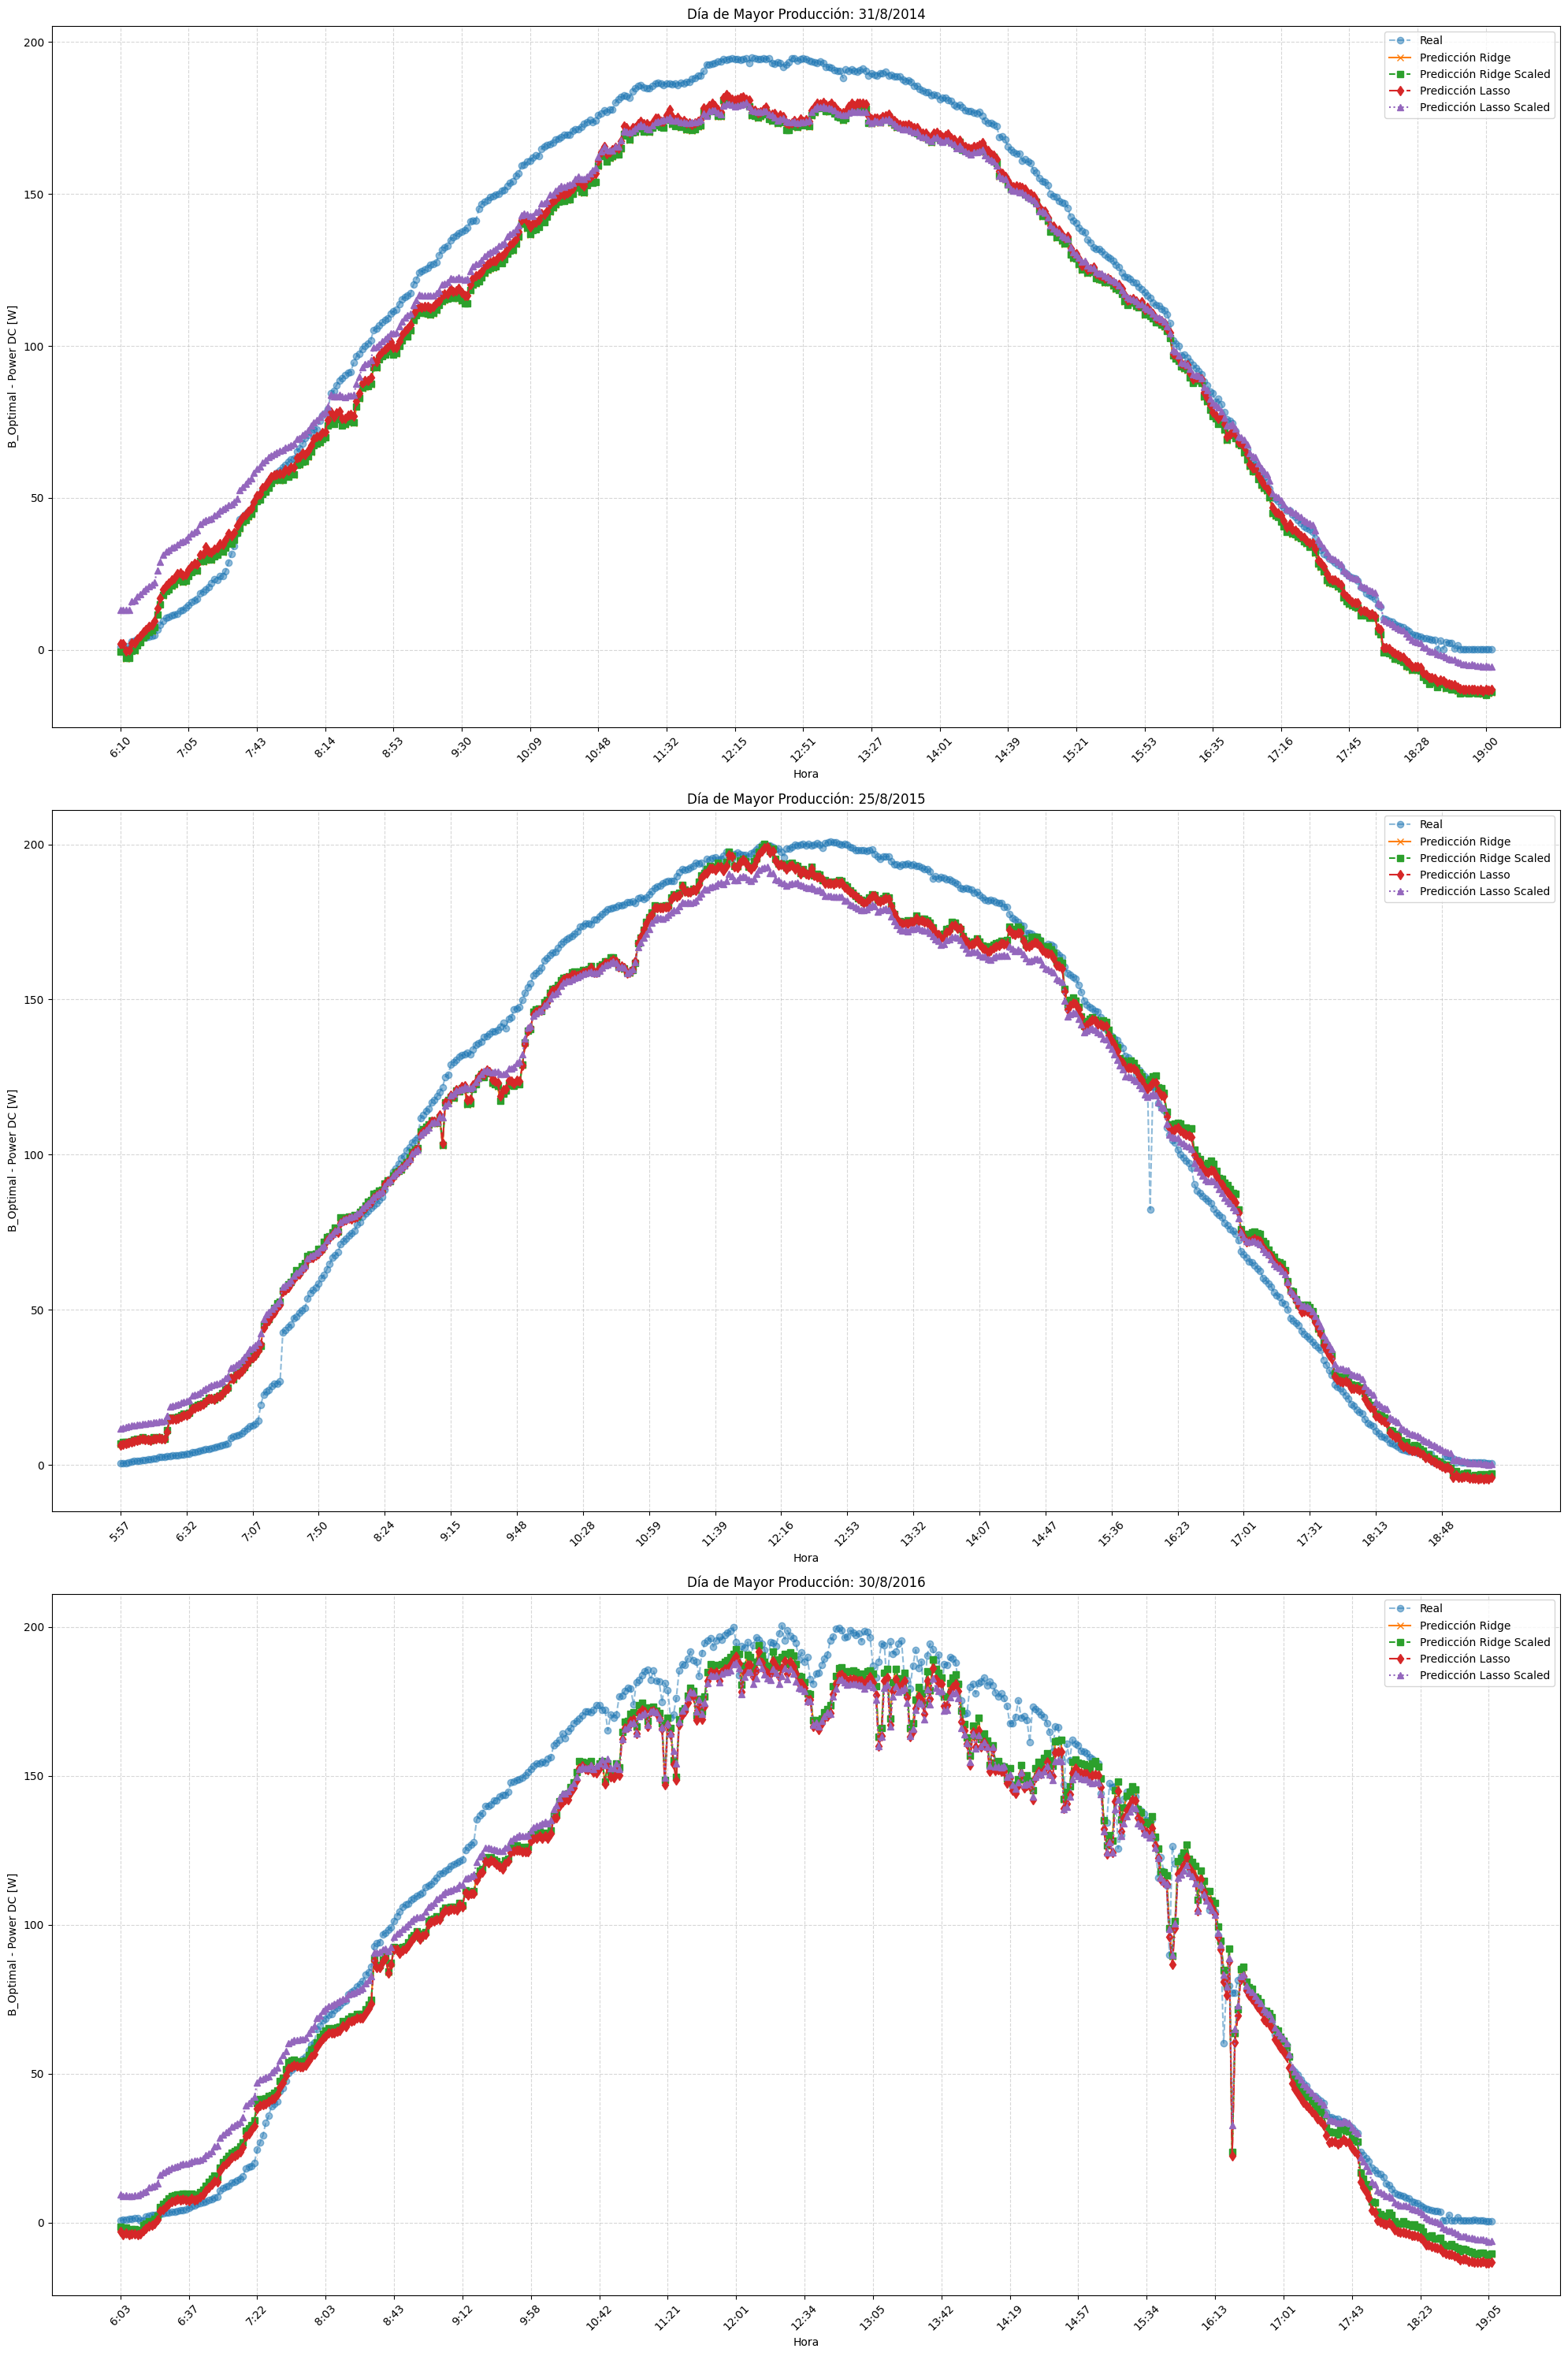

In [15]:
# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_train_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_rdg_cv_scaled)
y_train_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción Ridge': y_train_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_train_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_train_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_train_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge'], label='Predicción Ridge', marker="x", linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge Scaled'], label='Predicción Ridge Scaled', marker="s", linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso'], label='Predicción Lasso', marker="d", linestyle="-.")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso Scaled'], label='Predicción Lasso Scaled', marker="^", linestyle=":")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

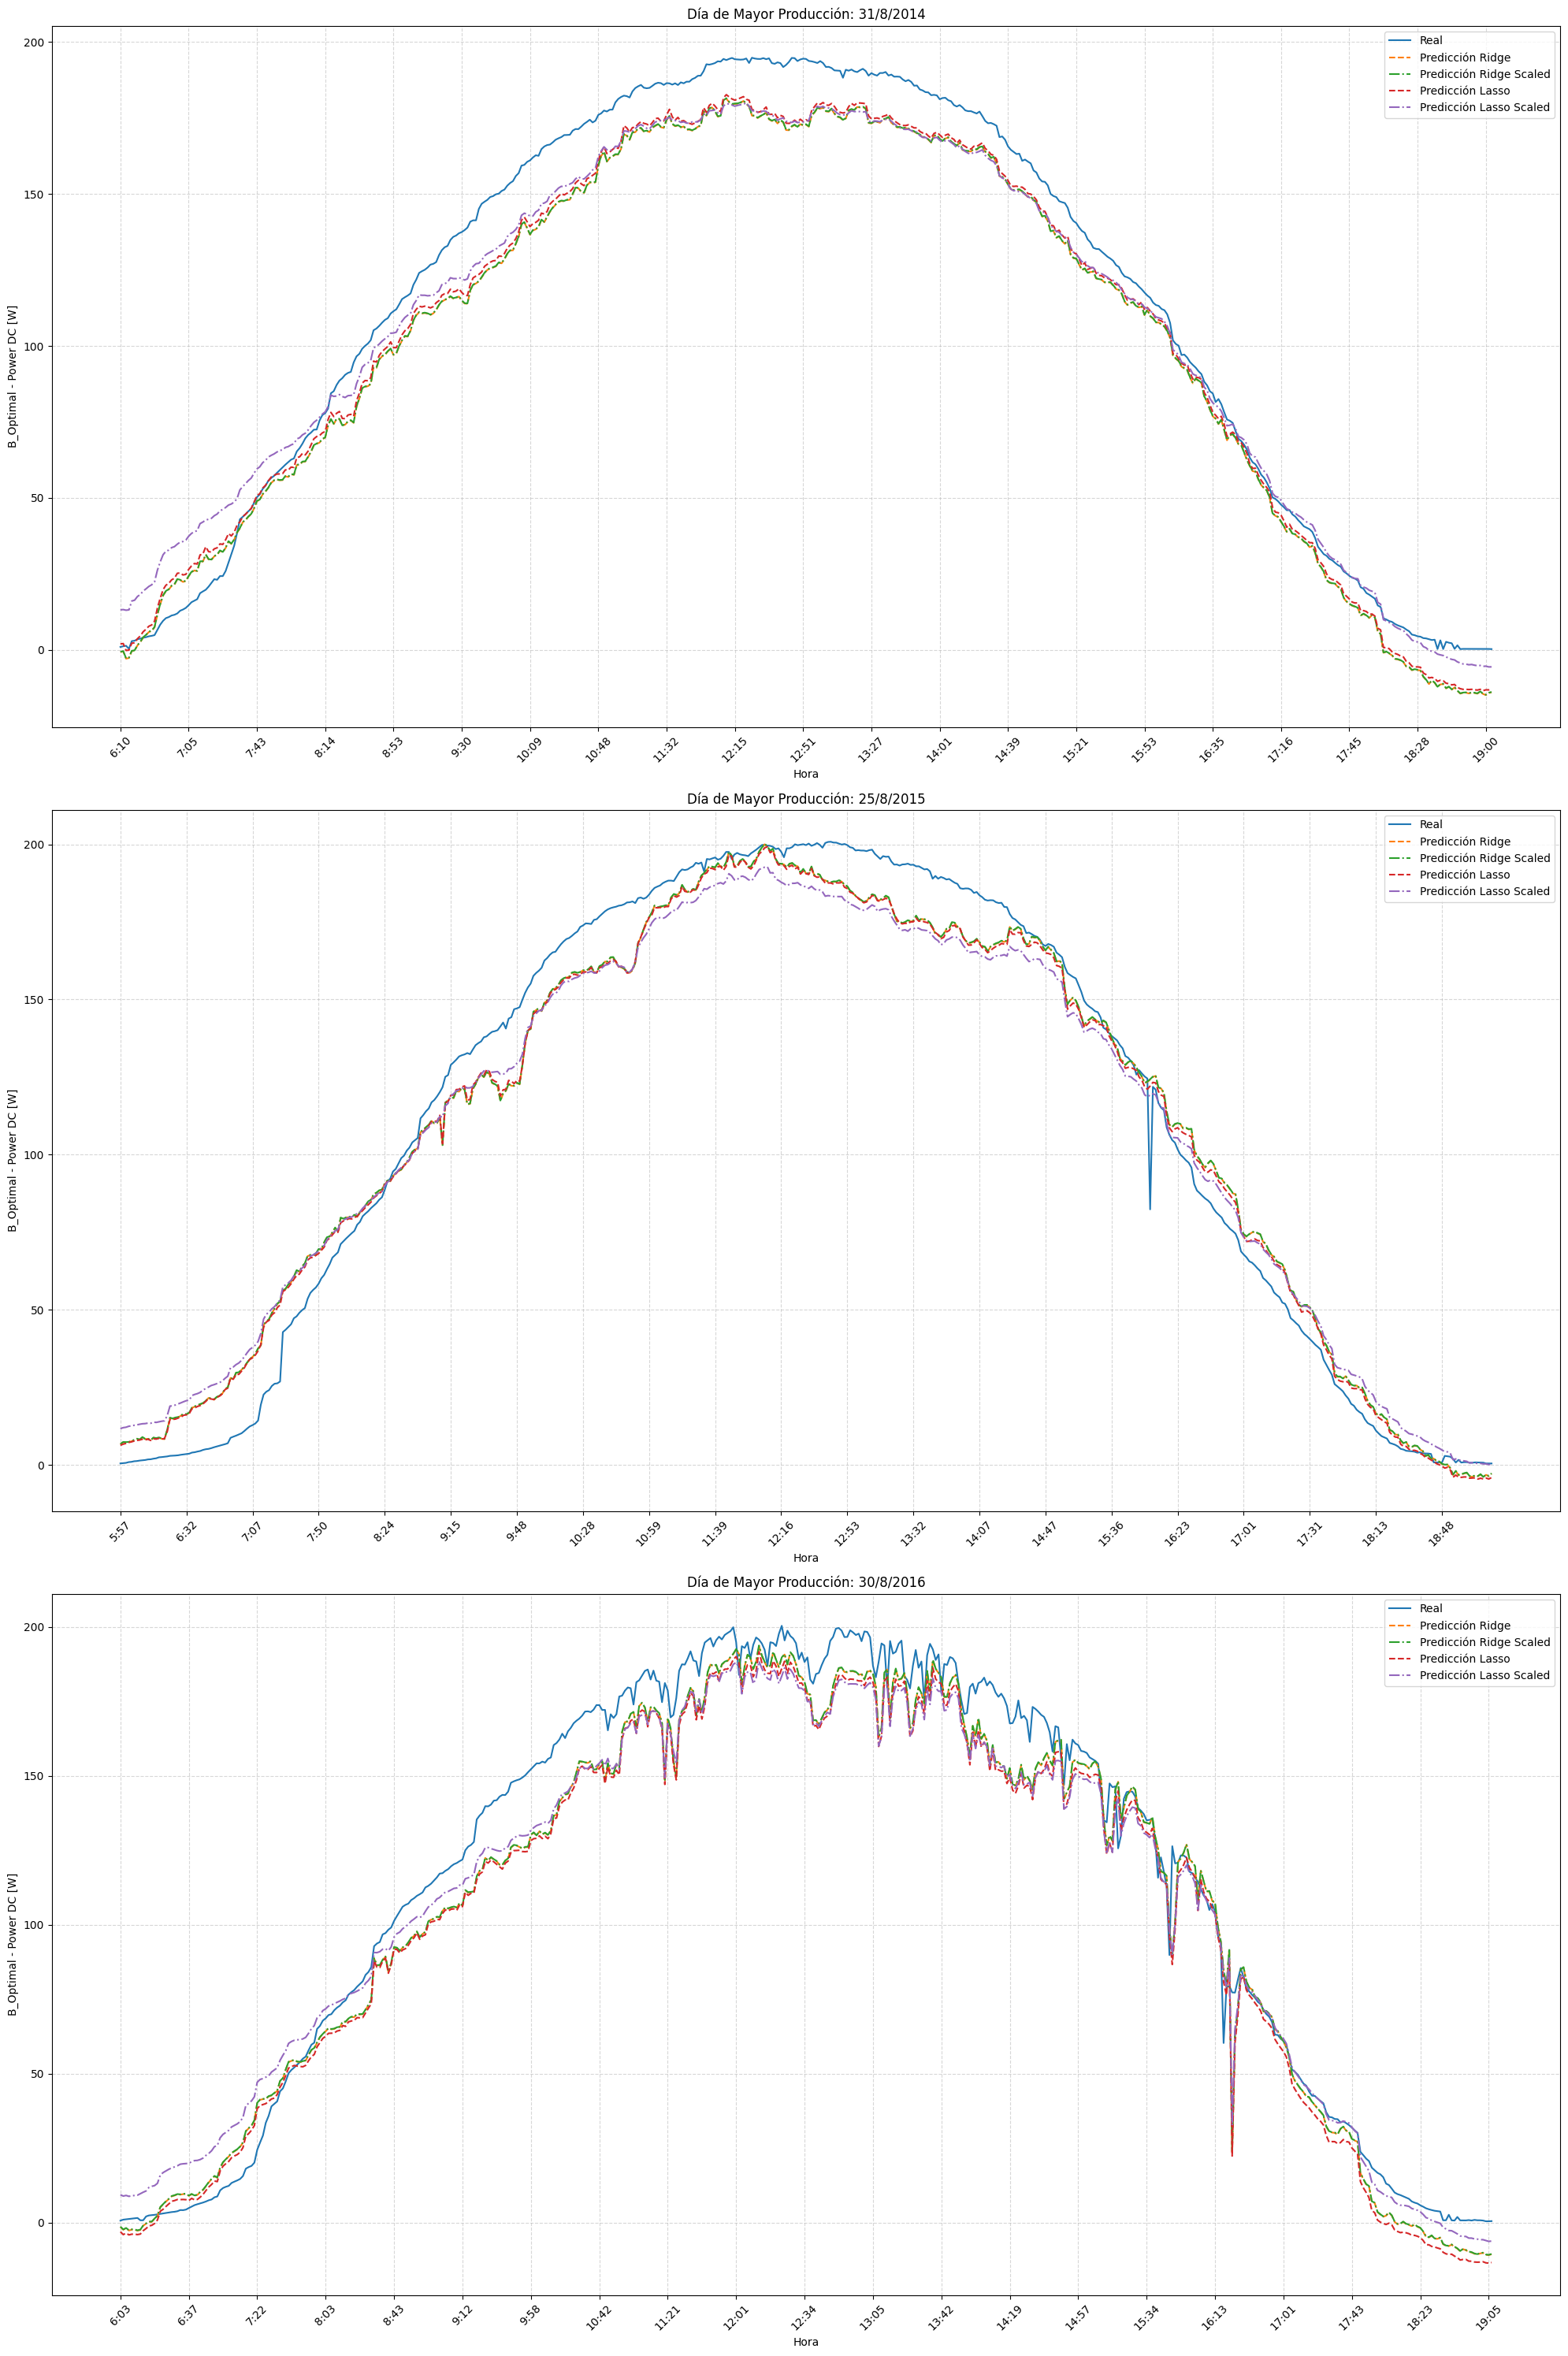

In [16]:
# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_train_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_rdg_cv_scaled)
y_train_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción Ridge': y_train_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_train_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_train_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_train_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge'], label='Predicción Ridge',linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge Scaled'], label='Predicción Ridge Scaled', linestyle="-.")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso'], label='Predicción Lasso', linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso Scaled'], label='Predicción Lasso Scaled', linestyle="-.")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

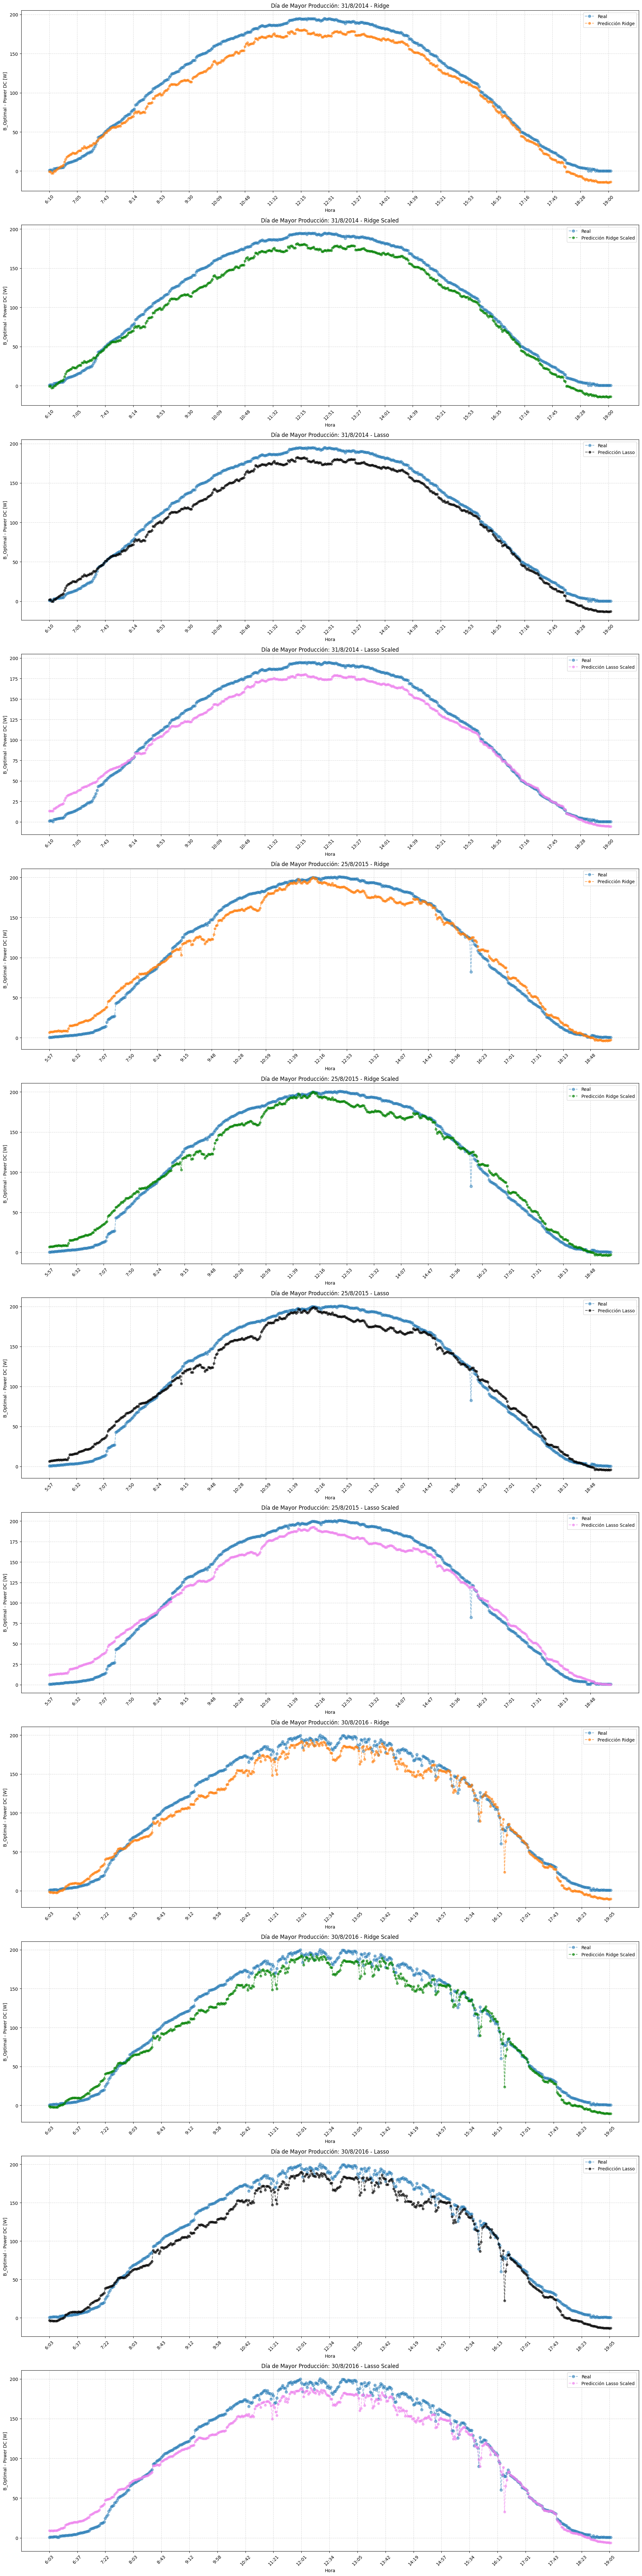

In [17]:
# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_train_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_rdg_cv_scaled)
y_train_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción Ridge': y_train_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_train_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_train_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_train_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(12, 1, figsize=(20, 80))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - Ridge
    ax = axes[i * 4]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge'], label='Predicción Ridge', marker="o", linestyle="dashed", alpha=0.6, markersize = 5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Ridge')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Ridge Scaled
    ax = axes[i * 4 + 1]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge Scaled'], label='Predicción Ridge Scaled', marker="o", linestyle="dashed", color ='green', alpha=0.6, markersize = 5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Ridge Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso
    ax = axes[i * 4 + 2]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso'], label='Predicción Lasso', marker="o", linestyle="dashed", color = 'black', alpha=0.6, markersize = 5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Lasso')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso Scaled
    ax = axes[i * 4 + 3]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso Scaled'], label='Predicción Lasso Scaled', marker="o", linestyle="dashed", color = 'violet', alpha=0.6, markersize = 5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Lasso Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

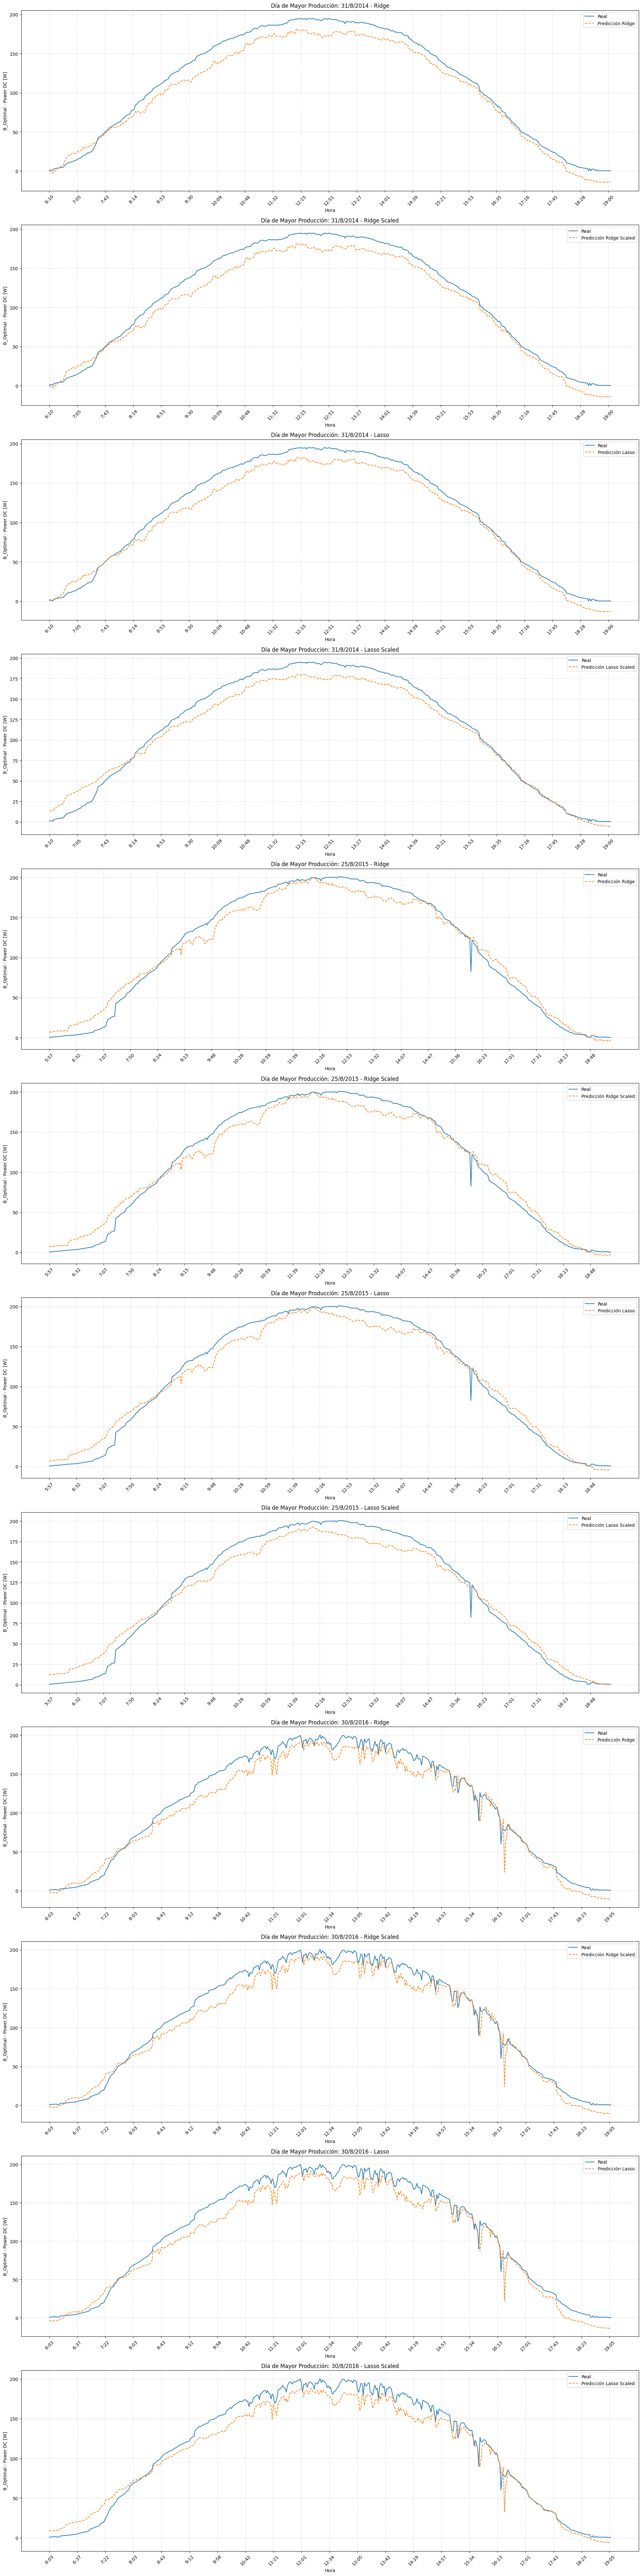

In [18]:
# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_train_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_rdg_cv_scaled)
y_train_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción Ridge': y_train_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_train_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_train_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_train_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(12, 1, figsize=(20, 80))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - Ridge
    ax = axes[i * 4]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge'], label='Predicción Ridge', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Ridge')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Ridge Scaled
    ax = axes[i * 4 + 1]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge Scaled'], label='Predicción Ridge Scaled', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Ridge Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso
    ax = axes[i * 4 + 2]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso'], label='Predicción Lasso', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Lasso')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso Scaled
    ax = axes[i * 4 + 3]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso Scaled'], label='Predicción Lasso Scaled', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Lasso Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

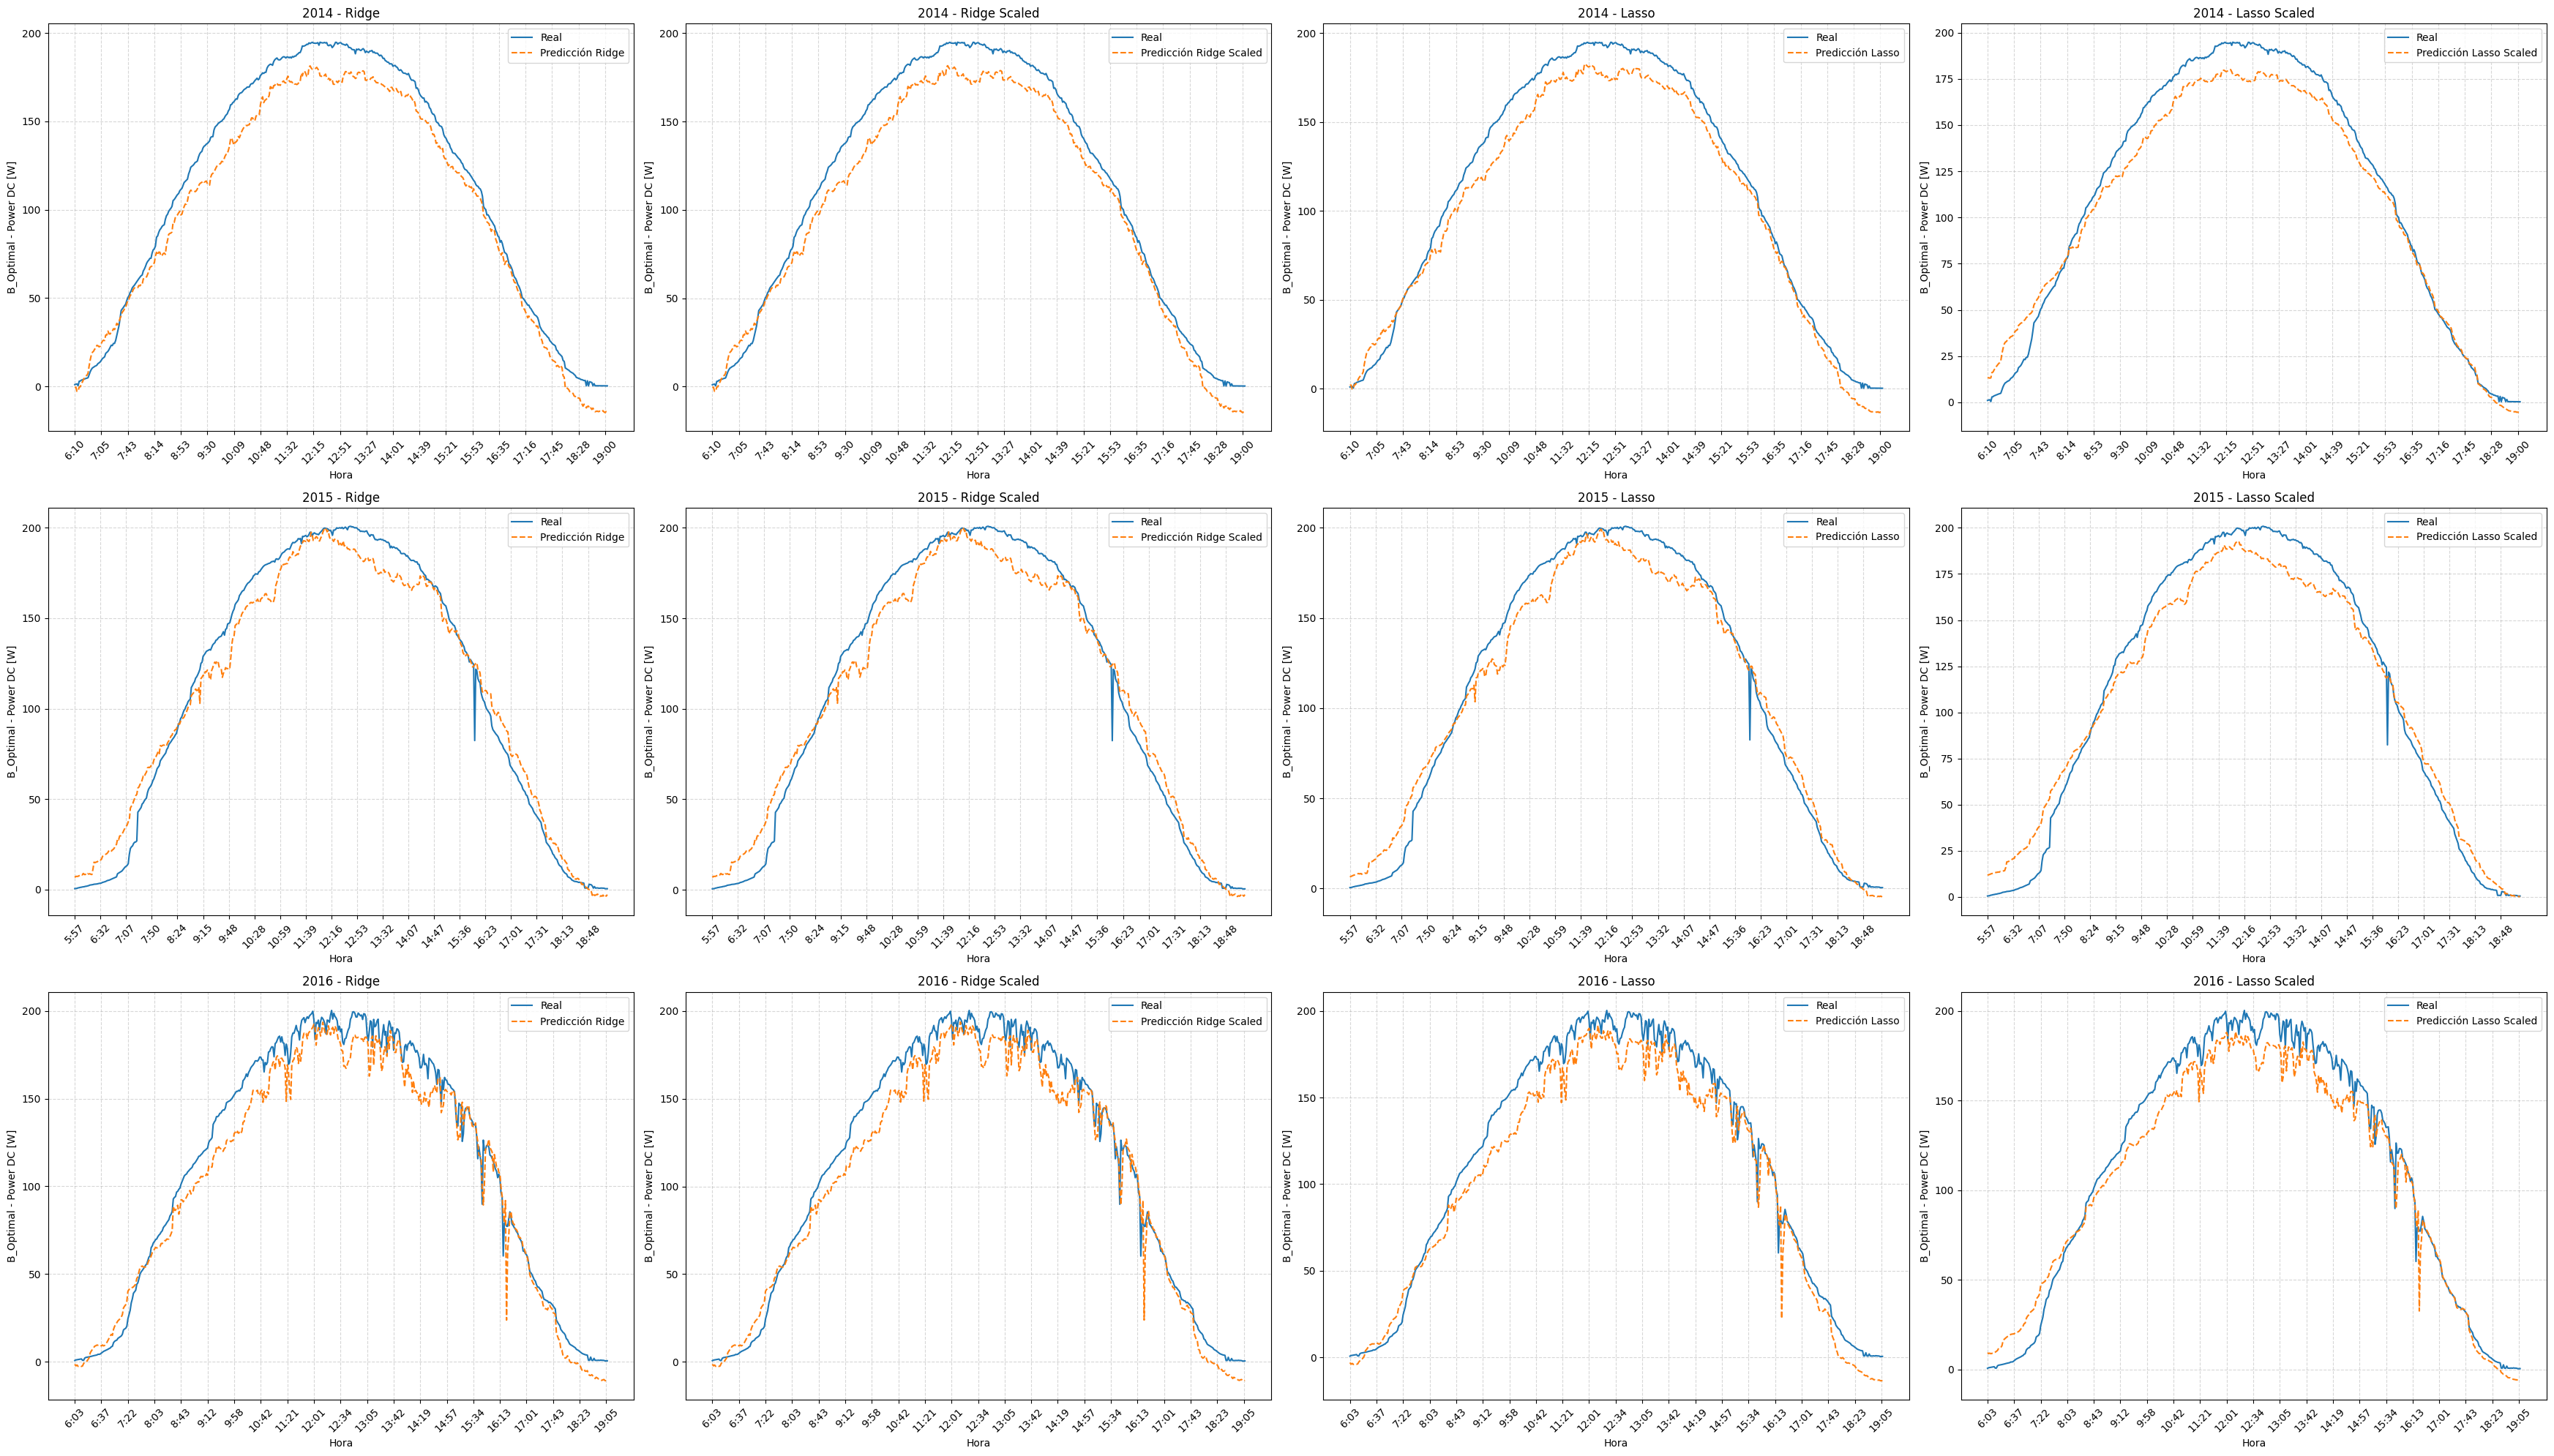

In [19]:
# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_train_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_rdg_cv_scaled)
y_train_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_train_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción Ridge': y_train_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_train_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_train_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_train_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 4, figsize=(35, 20))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - Ridge
    ax = axes[i, 0]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge'], label='Predicción Ridge', linestyle="--")
    ax.set_title(f'{year} - Ridge')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Ridge Scaled
    ax = axes[i, 1]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Ridge Scaled'], label='Predicción Ridge Scaled', linestyle="--")
    ax.set_title(f'{year} - Ridge Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso
    ax = axes[i, 2]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso'], label='Predicción Lasso', linestyle="--")
    ax.set_title(f'{year} - Lasso')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - Lasso Scaled
    ax = axes[i, 3]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción Lasso Scaled'], label='Predicción Lasso Scaled', linestyle="--")
    ax.set_title(f'{year} - Lasso Scaled')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


# Guardar el Modelo

In [ ]:
#Guardar el modelo de LinearRegression_model
import joblib

joblib.dump(rdg_cv, 'model_B_Ridge.pkl')
joblib.dump(rdg_cv_scaled, 'model_B_RidgeScaled.pkl')
joblib.dump(lasso_cv, 'model_B_Lasso.pkl')
joblib.dump(lasso_cv_scaled, 'model_B_LassoScaled.pkl')

# 5. Energía

In [30]:
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

# Invertir el escalado de las predicciones de Ridge Scaled y Lasso Scaled
y_test_prep_pred_rdg_cv_scaled_inv = scaler.inverse_transform(y_test_prep_pred_rdg_cv_scaled)
y_test_prep_pred_lasso_cv_scaled_inv = scaler.inverse_transform(y_test_prep_pred_lasso_cv_scaled.reshape(-1, 1))

# Crear un DataFrame con los valores reales y predichos para Ridge, Ridge Scaled, Lasso y Lasso Scaled
comparacion = pd.DataFrame({
    'Real': y_test_copy.values.flatten(),
    'Predicción Ridge': y_test_prep_pred_rdg_cv.flatten(),
    'Predicción Ridge Scaled': y_test_prep_pred_rdg_cv_scaled_inv.flatten(),
    'Predicción Lasso': y_test_prep_pred_lasso_cv.flatten(),
    'Predicción Lasso Scaled': y_test_prep_pred_lasso_cv_scaled_inv.flatten(),
    'Mes': X_test_copy['Mes'].values.flatten(),
    'Año': X_test_copy['Año'].values.flatten(),
    'Día': X_test_copy['Día'].values.flatten(),
    'Hora': X_test_copy['Hora'].values.flatten(),
    'Minuto': X_test_copy['Minuto'].values.flatten()
})

# Filtrar los datos para los años 2014, 2015 y 2016
datos_filtrados = comparacion[comparacion['Año'].isin([2014, 2015, 2016])]

# Inicializar una lista para almacenar los resultados
resultados_totales = []

# Iterar sobre cada día de los años 2014, 2015 y 2016
for year in [2014, 2015, 2016]:
    for mes in range(1, 13):
        for dia in range(1, 32):
            dia_datos = datos_filtrados[(datos_filtrados['Año'] == year) & (datos_filtrados['Mes'] == mes) & (datos_filtrados['Día'] == dia)]
            if not dia_datos.empty:
                y_real = dia_datos['Real'].values
                x = np.arange(len(y_real))
                
                for modelo in ['Predicción Ridge', 'Predicción Ridge Scaled', 'Predicción Lasso', 'Predicción Lasso Scaled']:
                    y_pred = dia_datos[modelo].values
                    area_real = simpson_manual(y_real, x)
                    area_pred = simpson_manual(y_pred, x)
                    error_relativo = abs(area_pred - area_real) / area_real * 100
                    mae = np.mean(np.abs(y_real - y_pred))

                    resultados_totales.append({
                        'Fecha': f'{dia}/{mes}/{year}',
                        'Modelo': modelo,
                        'Área Real': area_real,
                        'Área Predicha': area_pred,
                        'Error Relativo (%)': error_relativo,
                        'MAE': mae
                    })

# Crear un DataFrame con los resultados
df_resultados_totales = pd.DataFrame(resultados_totales)

# Mostrar el DataFrame con los resultados
print(df_resultados_totales)
print(df_resultados_totales.describe())



           Fecha                   Modelo     Área Real  Área Predicha  \
0       1/1/2014         Predicción Ridge   6408.428917    5752.036722   
1       1/1/2014  Predicción Ridge Scaled   6408.428917    5852.630817   
2       1/1/2014         Predicción Lasso   6408.428917    6096.865307   
3       1/1/2014  Predicción Lasso Scaled   6408.428917    6747.691662   
4       2/1/2014         Predicción Ridge   1538.125417    6565.689121   
...          ...                      ...           ...            ...   
3427  28/12/2016  Predicción Lasso Scaled  12250.616458    9713.771720   
3428  29/12/2016         Predicción Ridge  14129.196417   12241.646851   
3429  29/12/2016  Predicción Ridge Scaled  14129.196417   12340.023281   
3430  29/12/2016         Predicción Lasso  14129.196417   11686.087986   
3431  29/12/2016  Predicción Lasso Scaled  14129.196417   10022.090603   

      Error Relativo (%)        MAE  
0              10.242638  14.087889  
1               8.672923  14.201615

In [31]:
# Crear un diccionario para almacenar los DataFrames
dataframes_resultados = {}

# Lista de modelos
modelos = df_resultados_totales['Modelo'].unique()

# Crear un DataFrame para cada modelo y almacenarlo en el diccionario
for modelo in modelos:
    dataframes_resultados[modelo] = df_resultados_totales[df_resultados_totales['Modelo'] == modelo][['Área Real', 'Área Predicha', 'Error Relativo (%)', 'MAE']].copy()

# Mostrar los DataFrames creados
for modelo, df in dataframes_resultados.items():
    print(f"DataFrame para el modelo: {modelo}")
    print(df.head())
    print("\n")

#Describe de cada dataframe
for modelo, df in dataframes_resultados.items():
    print(f"Describe para el modelo: {modelo}")
    print(df.describe())
    print("\n")

DataFrame para el modelo: Predicción Ridge
       Área Real  Área Predicha  Error Relativo (%)        MAE
0    6408.428917    5752.036722           10.242638  14.087889
4    1538.125417    6565.689121          326.863054  51.719754
8    4084.387167    6211.842839           52.087512  29.552170
12   6863.023667    3603.198643           47.498379  33.802095
16  12521.184000   17623.582979           40.750132  48.294938


DataFrame para el modelo: Predicción Ridge Scaled
       Área Real  Área Predicha  Error Relativo (%)        MAE
1    6408.428917    5852.630817            8.672923  14.201615
5    1538.125417    6647.106859          332.156363  52.551174
9    4084.387167    6296.863710           54.169119  29.952129
13   6863.023667    3725.129113           45.721750  33.559853
17  12521.184000   17649.526693           40.957330  48.483853


DataFrame para el modelo: Predicción Lasso
       Área Real  Área Predicha  Error Relativo (%)        MAE
2    6408.428917    6096.865307          